In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xbpch
from WhGrYlRd import WhGrYlRd

# Preprocessing

In [2]:
maindir = "./data/"

## Height info

In [3]:
ds_h = xr.open_dataset(maindir+"ScharMoutain_ModelLevelAltitude.nc")
ds_h

<xarray.Dataset>
Dimensions:       (lat: 91, lev: 73, lon: 144)
Coordinates:
  * lon           (lon) float32 -180.0 -177.5 -175.0 -172.5 -170.0 -167.5 ...
  * lat           (lat) float32 -90.0 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 ...
  * lev           (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
Data variables:
    Alti_edge     (lev, lat, lon) float32 ...
    RefAlti_edge  (lev) float32 ...

In [4]:
heights = ds_h['RefAlti_edge'].values/1e3 # m -> km
heights.shape, heights.max()

((73,), 101.14928)

In [5]:
lats = ds_h['lat'].values
lats

array([-90., -88., -86., -84., -82., -80., -78., -76., -74., -72., -70.,
       -68., -66., -64., -62., -60., -58., -56., -54., -52., -50., -48.,
       -46., -44., -42., -40., -38., -36., -34., -32., -30., -28., -26.,
       -24., -22., -20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,
        -2.,   0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,
        20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,
        42.,  44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,
        64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,
        86.,  88.,  90.], dtype=float32)

# Restart file

In [6]:
ds_st = xbpch.open_bpchdataset(maindir+"test1-2_2x25_tropchem_72L.bpch")
dr_st = ds_st['IJ_AVG_S_NO']/1e9

/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/pandas/io/parsers.py:741: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/xbpch/core.py:91: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for v in ds:


In [7]:
dr_st

<xarray.DataArray 'IJ_AVG_S_NO' (lon: 144, lat: 91, lev: 72)>
dask.array<shape=(144, 91, 72), dtype=float32, chunksize=(144, 91, 72)>
Coordinates:
  * lev      (lev) float64 0.9925 0.9775 0.9624 0.9473 0.9322 0.9171 0.902 ...
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 -170.0 -167.5 -165.0 ...
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 ...

In [8]:
data_st = dr_st.mean(dim='lon').T

In [9]:
data_st.shape

(72, 91)

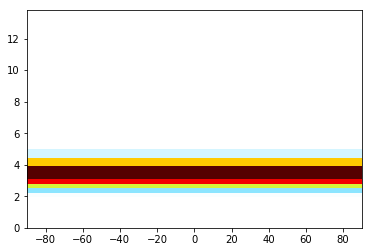

In [10]:
plt.pcolormesh(lats, heights[:31], data_st[:31], cmap=WhGrYlRd)

# GC-classic

In [11]:
ds_cc = xbpch.open_bpchdataset(maindir+"Test1-2_nullQVRH.ts20130702.bpch")
dr_cc = ds_cc['IJ_AVG_S_NO']/1e9

/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/pandas/io/parsers.py:741: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/xbpch/core.py:91: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for v in ds:


In [12]:
data_cc1 = dr_cc.isel(time=11).mean(dim='lon').T
data_cc2 = dr_cc.isel(time=23).mean(dim='lon').T
data_cc1.shape

(72, 91)

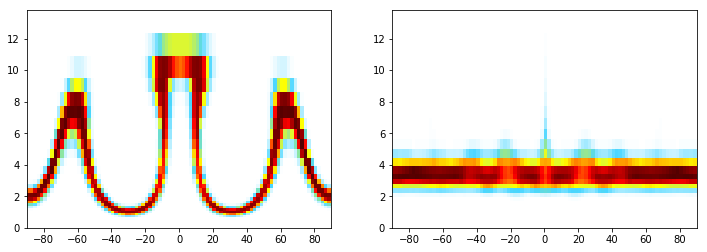

In [13]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.pcolormesh(lats, heights[:31], data_cc1[:31], cmap=WhGrYlRd)
plt.subplot(122)
plt.pcolormesh(lats, heights[:31], data_cc2[:31], cmap=WhGrYlRd)

# GCHP

In [14]:
ds_hp1 = xr.open_dataset(maindir+"GCHP_oldver_FixOffset_Test1-2.regrid.20130702_1200z.nc4")
data_hp1 = ds_hp1["TRC_NO"].isel(time=0).mean(dim='lon').values[::-1,:]

ds_hp2 = xr.open_dataset(maindir+"GCHP_oldver_FixOffset_Test1-2.regrid.20130702_2400z.nc4")
data_hp2 = ds_hp2["TRC_NO"].isel(time=0).mean(dim='lon').values[::-1,:]

In [15]:
data_hp1.shape

(72, 91)

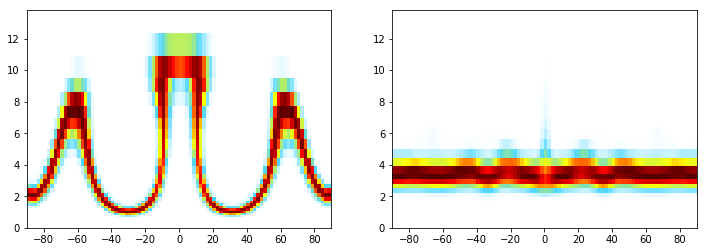

In [16]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.pcolormesh(lats, heights[:31], data_hp1[:31], cmap=WhGrYlRd)
plt.subplot(122)
plt.pcolormesh(lats, heights[:31], data_hp2[:31], cmap=WhGrYlRd)

# Put together

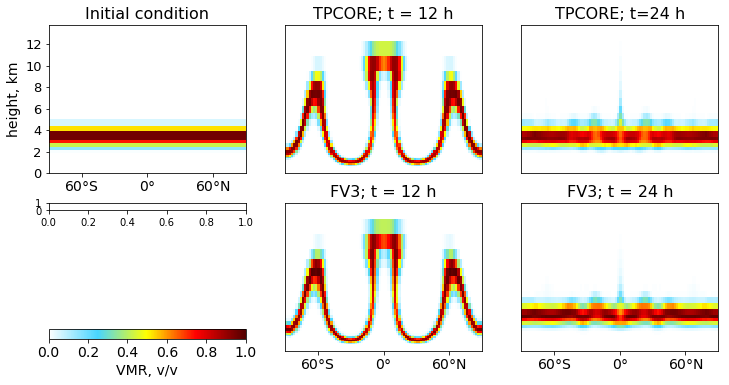

In [17]:
fig, axes = plt.subplots(2,3,figsize=[12,6])

ax_list = [axes[0,0], axes[0,1], axes[0,2], axes[1,1], axes[1,2]]
data_list = [data_st, data_cc1, data_cc2, data_hp1, data_hp2]
title_list = ['Initial condition', 
              'TPCORE; t = 12 h', 'TPCORE; t=24 h',
              'FV3; t = 12 h', 'FV3; t = 24 h']

for i in range(5):
    ax = ax_list[i]
    data = data_list[i]
    title = title_list[i]
    im = ax.pcolormesh(lats, heights[:31], data[:31],
                       cmap=WhGrYlRd, vmax=1.0, vmin=0.0)
    ax.set_title(title, fontsize=16)
    
    if i in [0, 3, 4]:
        ax.set_xticks([-60, 0, 60])
        ax.set_xticklabels( ['60$\degree$S',
                             '0$\degree$', 
                             '60$\degree$N'], 
                            fontsize=14)
 
    else:
        ax.set_xticks([])
        
    if i in [0]:
        ax.set_ylabel('height, km', fontsize=14)
        ylabels = [0, 2, 4, 6, 8, 10, 12]
        ax.set_yticks(ylabels)
        ax.set_yticklabels(ylabels, fontsize=13)
    else:
        ax.set_yticks([])
    
cb = plt.colorbar(im, ax=axes[1,0], 
                  orientation='horizontal', pad=0.8)
cb.set_label('VMR, v/v', fontsize=14)
cb.ax.tick_params(labelsize=14)
fig.savefig('DCMIP_test1-2.png', dpi=400)

# Also plot difference

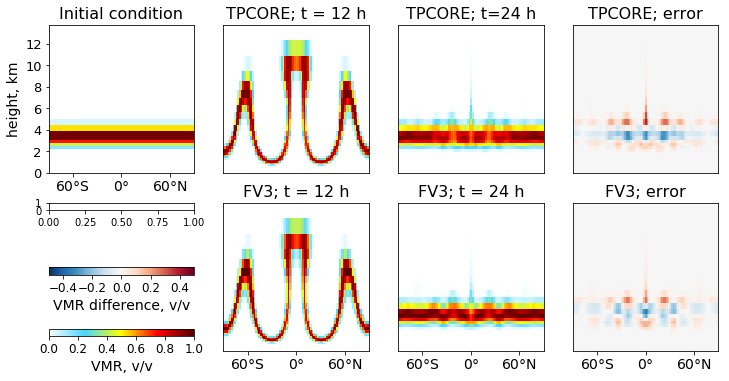

In [18]:
fig, axes = plt.subplots(2,4,figsize=[12,6])

ax_list = [axes[0,0], axes[0,1], axes[0,2], axes[1,1], axes[1,2],
           axes[0,3], axes[1,3]]
data_list = [data_st, data_cc1, data_cc2, data_hp1, data_hp2, 
             data_cc2 - data_st, data_hp2 - data_st]
title_list = ['Initial condition', 
              'TPCORE; t = 12 h', 'TPCORE; t=24 h',
              'FV3; t = 12 h', 'FV3; t = 24 h',
              'TPCORE; error', 'FV3; error']

for i in range(7):
    ax = ax_list[i]
    data = data_list[i]
    title = title_list[i]
    
    if i in [5, 6]:
        vmax, vmin = 0.5, -0.5
        cmap = 'RdBu_r'
    else:
        vmax, vmin = 1.0, 0.0
        cmap = WhGrYlRd
    im_temp = ax.pcolormesh(lats, heights[:31], data[:31],
                            cmap=cmap, vmax=vmax, vmin=vmin)
    ax.set_title(title, fontsize=16)
    
    if i == 0:
        im_abs = im_temp 
    if i == 6:
        im_diff = im_temp 
    
    if i in [0, 3, 4, 6]:
        ax.set_xticks([-60, 0, 60])
        ax.set_xticklabels( ['60$\degree$S',
                             '0$\degree$', 
                             '60$\degree$N'], 
                            fontsize=14)
 
    else:
        ax.set_xticks([])
        
    if i in [0]:
        ax.set_ylabel('height, km', fontsize=14)
        ylabels = [0, 2, 4, 6, 8, 10, 12]
        ax.set_yticks(ylabels)
        ax.set_yticklabels(ylabels, fontsize=13)
    else:
        ax.set_yticks([])
    

cb = plt.colorbar(im_abs, ax=axes[1,0], 
                  orientation='horizontal', pad=0.8)
cb.set_label('VMR, v/v', fontsize=14)
cb.ax.tick_params(labelsize=12)

p = axes[1,0].get_position()

cax = fig.add_axes([p.x0, p.y0-0.15, p.width, p.height] )

cb2 = plt.colorbar(im_diff, cax=cax,
                  orientation='horizontal')
cb2.set_label('VMR difference, v/v', fontsize=14)
cb2.ax.tick_params(labelsize=12)

fig.savefig('DCMIP_test1-2.png', dpi=400)